# MIT-BIH Arrhythmia Data Analysis

## Overview

- Set of over 4000 long-term Holter Recordings
- Obtained by the Beth Israel Hospital Arrhythmia Laboratory
- Obtained betwee 1975 and 1979
- **60% of the recordings were obtainer from inpatients**
- **23 records in total chosen from id 100-124 inclusive (Group A)**
- **25 records chosen from ids 200-234 inclusive (Group B)**
- **Total there are 48 records**
- **Each record is 30 minutes long**
- **2 signals recorded**
- Group B records were chosen to include complex ventricular,junctional and supraventricular arrhythmias and conduction abnormalities
- Subjects were 25 men aged 32 to 89 years, 22 women aged 23 to 89 years.
- Records 201 and 202 came from the same male subject

## ECG Lead Configuration
- Most records the first signal seen is the modified limb lead II(MLII) obtained by placing the electrodes on the chest
- The lower signal is a modified lead V1
- QRS Complexes are seen in the MLII signal only
- Normal beats are difficult to discern in the lower signal

## Exceptions

- Record 114 the signals are reversed .i.e MLII is the second signal.
- Records 102 and 104 do not have MLII signal because of surgical dressing, modified lead V5 used for the upped signal.
- 4 records (102,104,107,217) include paced beats 


## Digitisation process

The digitization process happend at **360Hz**
The ADCs were unipolar, with 11 bit resolution ranging from +5mv to -5mV
Sample values range from 0 to 2047 inclusive with a value of 1024 corresponding to 0

A number of frequency-domain artifacts have been identified and related to specific mechanical components of the recorders and the playback unit:


| Frequency(Hz)     | Source |
| ----------- | ----------- |
| 0.042      | Recorder pressure wheel       |
| 0.083   | Playback unit capstan     |
| 0.090 | Recorder capstan |
|0.167 | Playback unit capstan |
| 0.10-0.18 |Takeup reel |
| 0.20-0.36 | Supply reel  |


- **Bit Depth(n)**: 11
- **Levels(2<sup>n</sup>)**:2048
- **Voltage Range(r)**: 10mV
- **Step Size(delta)**: 4.88x10<sup>-3</sup>mV
- **Maximum Voltage**: 5mV
- **Minimum Voltage**: -5mV

Calculations:
```
Index = Round((Xalpha - Xmin)/delta) # Calculate the corresponding discrete value for a voltage

Xalpha = Xmin + (Index*delta) # Calculate the corresponding voltage for a discrete value.
```

## Exploration

In [2]:
from data_set_utils.data_reader import DataReader

In [3]:
%matplotlib inline

In [4]:
path = "/mnt/d/git/Arrhythmia-Detection/raw_data/mit-bih-arrhythmia-database-1.0.0"
path = "C:/Users/HP/Documents/Varun/DHAI/Capstone/Arrhythmia-Detection/raw_data/mit-bih-arrhythmia-database-1.0.0"
dr = DataReader(path, 11, 5, -5)
columns = ["N", "/", "R", "L", "V", "gender", "age", "leads"]

### Example Record

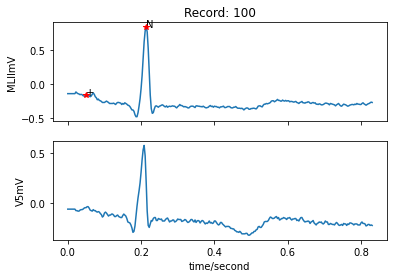

In [5]:
dr.plot_record("100", 300)

In [6]:
from utils.common_utils import load_patient_ids

In [7]:
patient_ids = load_patient_ids(path)

In [8]:
patient_ids.remove("102-0")

In [9]:
patient_ids

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [10]:
len(patient_ids)

48

### Loading all patient records

In [11]:
records = dr.load_records(record_ids=patient_ids)

#### Counting annotations in all records

In [12]:
from data_set_utils.data_reader import count_annotations

In [13]:
count_tuple = count_annotations(records)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.DataFrame(data={"Count": count_tuple[1]}, index=count_tuple[0])
classes_list = ['N','L','R','V','/','A']

<AxesSubplot:>

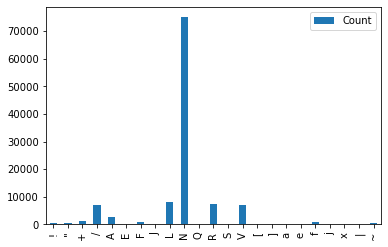

In [16]:
df.plot(kind="bar")
 

In [17]:
patient_data = dict()
patient_data["id"] = patient_ids

In [18]:
for i in count_tuple[0]:
    patient_data[i] = [0] * len(patient_ids)

In [19]:
patient_data_frame = pd.DataFrame(data=patient_data)

In [20]:
patient_data_frame.set_index("id", inplace=True)

In [21]:
ages = []
gender = []
leads = []
for record_id in patient_data["id"]:
    ecg_record = dr.load_record(record_id)
    ages.append(ecg_record.patient_age())
    gender.append(ecg_record.patient_gender())
    leads.append(ecg_record.leads())
    record_annotation_count_tuple = count_annotations([ecg_record])
    for symbol, count in zip(
        record_annotation_count_tuple[0], record_annotation_count_tuple[1]
    ):
        patient_data_frame.loc[record_id][symbol] = count

In [22]:
patient_data_frame.columns

,!,"""",+,/,A,E,F,J,L,N,...,V,[,],a,e,f,j,x,|,~
id,,,,,,,,,,,,,,,,,,,,,
100,0,0,1,0,33,0,0,0,0,2239,...,1,0,0,0,0,0,0,0,0,0
101,0,0,1,0,3,0,0,0,0,1860,...,0,0,0,0,0,0,0,0,4,4
102,0,0,5,2028,0,0,0,0,0,99,...,4,0,0,0,0,56,0,0,0,0
103,0,0,1,0,2,0,0,0,0,2082,...,0,0,0,0,0,0,0,0,0,6
104,0,0,45,1380,0,0,0,0,0,163,...,2,0,0,0,0,666,0,0,0,37
105,0,0,1,0,0,0,0,0,0,2526,...,41,0,0,0,0,0,0,0,30,88
106,0,0,41,0,0,0,0,0,0,1507,...,520,0,0,0,0,0,0,0,0,30
107,0,0,1,2078,0,0,0,0,0,0,...,59,0,0,0,0,0,0,0,0,2
108,0,0,1,0,4,0,2,0,0,1739,...,17,0,0,0,0,0,1,11,8,41


In [23]:
record_id = '100'
symbol ='N'
patient_data_frame.loc[record_id][symbol]
records[0].__dict__['_ECGRecord__annotation'].__dict__

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991], dtype=int64),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',

In [24]:
records[0].__dict__

{'_ECGRecord__record': <wfdb.io.record.Record at 0x19699b6eb20>,
 '_ECGRecord__annotation': <wfdb.io.annotation.Annotation at 0x19699b6ebb0>,
 '_ECGRecord__bit_depth': 11,
 '_ECGRecord__max_voltage': 5,
 '_ECGRecord__min_voltage': -5,
 '_ECGRecord__levels': 2048,
 '_ECGRecord__step_size': 0.0048828125}

In [25]:
records[2].__dict__['_ECGRecord__record'].__dict__

{'record_name': '102',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['84 F 1525 167 x1',
  'Digoxin',
  'The rhythm is paced with a demand pacemaker.  The PVCs are multiform.'],
 'sig_name': ['V5', 'V2'],
 'p_signal': array([[-0.2  ,  0.005],
        [-0.2  ,  0.005],
        [-0.2  ,  0.005],
        ...,
        [-0.17 ,  0.2  ],
        [-0.195,  0.195],
        [ 0.   ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['102.dat', '102.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [984, 1025],
 'checksum': [-28574, 13743],
 'block_size': [0, 0]}

In [26]:
classes_list = ['N','L','R','V','/','A']

In [33]:
# Create a function to get spectogram

def spectogram_ext(cls,rec_nm,sams):

    fs = 360
    cls_sam_list = []
    signal_dict = {'labels':[],'files':[]}
    

    for idx, record in enumerate(records):
        if record.__dict__['_ECGRecord__annotation'].__dict__['record_name'] == rec_nm:
            rec = record
            for ids, sym in enumerate(record.__dict__['_ECGRecord__annotation'].__dict__['symbol']):
                cls_sam_list.append(record.__dict__['_ECGRecord__annotation'].__dict__['sample'][ids])

    g = np.ceil(len(cls_sam_list)/sams)

    for ide, sam in enumerate(cls_sam_list):
        if ide%g == 0 and sam>101:

            c=0
            label = cls

            filename = f"C:\\Users\\HP\\Documents\\Varun\\DHAI\\Capstone\\checkpoint\\spectogram\\specgram_{rec_nm}_{sam}.png"

            sym_list = rec.__dict__['_ECGRecord__annotation'].__dict__['symbol'][sam-100:sam+3500]
            p_signal_list = rec.__dict__['_ECGRecord__record'].__dict__['p_signal'][sam-100:sam+3500]

            for sym in set(sym_list):
                if c< sym_list.count(sym):
                    c = sym_list.count(sym)
                    label = sym
            signal_dict['labels'].append(label)

            x = []
            for s1, s2 in p_signal_list:
                x.append(s1)

            plt.specgram(x=x, Fs=fs, cmap="rainbow")
            plt.axis('off')
            plt.savefig(filename)
            signal_dict['files'].append(filename)
        
    df =  pd.DataFrame(signal_dict)
    
    return df

In [28]:
cls = 'N'
rec_nm = '100'
sams = 300

# df1 = spectogram_ext(cls,rec_nm,sams)  #(284, 2)

In [29]:
cls = 'L'
rec_nm = '109'  #
sams = 300

# df2 = spectogram_ext(cls,rec_nm,sams) #(281, 2)

In [30]:
ad_tuple_list = [
    ('N','100',300),
    ('N','112',300),
    ('N','205',300),
    ('N','234',300),
    ('L','109',300),
    ('L','111',300),
    ('L','207',250),
    ('L','214',250),
    ('R','118',300),
    ('R','124',250),
    ('R','212',250),
    ('R','231',250),
    ('V','106',100),
    ('V','119',100),
    ('V','200',100),
    ('V','203',100),
    ('V','208',100),
    ('V','221',100),
    ('V','223',100),
    ('V','233',100),
    ('/','102',250),
    ('/','104',250),
    ('/','107',250),
    ('/','217',250),
    ('A','209',100),
    ('A','222',100),
    ('A','232',300)
]

completed record 0
completed record 1
completed record 2
completed record 3
completed record 4
completed record 5
completed record 6
completed record 7
completed record 8
completed record 9
completed record 10
completed record 11
completed record 12
completed record 13
completed record 14
completed record 15
completed record 16
completed record 17
completed record 18
completed record 19
completed record 20


C:\Users\HP\AppData\Local\Temp/ipykernel_10612/2076824013.py:39: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=224).
  plt.specgram(x=x, Fs=fs, cmap="rainbow")


completed record 21
completed record 22
completed record 23
completed record 24
completed record 25
completed record 26


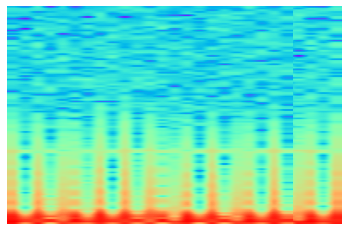

In [34]:
## Left --- 20-23
# for idx, (cls, rec_nm, sams) in enumerate(ad_tuple_list):  
#     if idx == 0:
#         df = spectogram_ext(cls,rec_nm,sams) 
#     else:
#         dfa = spectogram_ext(cls,rec_nm,sams)
#         df = pd.concat([df,dfa])
#     print(f"completed record {idx}")

for idx, (cls, rec_nm, sams) in enumerate(ad_tuple_list):
    if idx > 19 and idx < 24:
        dfa = spectogram_ext(cls,rec_nm,sams)
        df = pd.concat([df,dfa])
    print(f"completed record {idx}") 

In [35]:
print(df.shape)
print(df['labels'].value_counts())
df['cl2'] = df['files'].apply(lambda x: x.split('_')[1])
print(df['cl2'].value_counts())

(5305, 2)
N    1140
L    1014
R     973
/     939
V     785
A     454
Name: labels, dtype: int64
N      1139
L      1014
R       974
V       785
A       454
102     243
107     237
104     231
217     228
Name: cl2, dtype: int64


In [36]:
df.to_csv("class_filename.csv", index=False) ## 

In [37]:
## N --additional rec due to majority rule while one less in R
243+237+231+228-939

0

In [ ]:
import cv2
from PIL import Image
import os
from random import shuffle

NORMAL_PATH = "C:\\Users\\HP\\Documents\\Varun\\DHAI\\Capstone\\checkpoint\\spectogram\\"

img_paths = os.listdir(NORMAL_PATH)
ig =[]
for img in img_paths:
    if img.endswith(".png"):
        ig.append(img)

shuffle(ig)
image_array = []

for i,image in enumerate(ig[:4]):
    image2 = Image.open(os.path.join(NORMAL_PATH, image)).convert("L")
    image2 = image2.resize((256,256))
    plt.imshow(image2)
    array = np.asarray(image2)
    array = array.reshape(1,256,256)
    
    image_array.append(array)
  


In [ ]:
image_array[0].shape
